In [1]:
import yfinance as yf
import pandas as pd
from noaa_sdk import NOAA
from datetime import datetime, timedelta
from meteostat import Point, Daily
import trading
from trading import CornModel, start, end, corn
import matplotlib.pyplot as plt
import numpy as np

[*********************100%***********************]  13 of 13 completed


In [2]:
cm = CornModel(corn)
cm.engineer_features()
cm.prep_data()
cm.train()
cm.evaluate()

{'R2': 0.9504195118222212, 'Mean Squared Error': 0.3219073696502742}

In [3]:
cm.cross_validate()

{'R2 scores': array([0.94123021, 0.92642609, 0.95386714, 0.9562162 , 0.93691005]),
 'Mean r2': 0.9429299370965485}

In [4]:
cm.predict_weekly()

{'Price at Market Close': 17.6299991607666,
 'Predicted Price (5d Ahead)': 17.93946815856918,
 'Expected Change': 0.3094689978025791,
 'Expected % Change': 1.7553545804543447}

In [5]:
cm.forecast_5_days()

array([17.72999954, 17.77189327, 17.81378699, 17.85568071, 17.89757444,
       17.93946816])

In [6]:
cm.feature_importance_ridge()

,Feature,Coefficient,Absolute Importance
5,Close_CORN_LAG,4.242389,4.242389
2,Close_TIP1,0.051892,0.051892
4,Close_ZC=F1,-0.040727,0.040727
6,Close_DBA_lag,0.036970,0.036970
8,V_ZS=F1,0.028402,0.028402
1,Close_CL=F1,0.026620,0.026620
9,V_UUP1,0.019040,0.019040
3,Close_UUP1,-0.013063,0.013063
0,Close_ZS=F1,0.006656,0.006656
7,Close_SOYB_lag,0.006450,0.006450


In [7]:
predictions, actual = cm.walk_forward_validation()

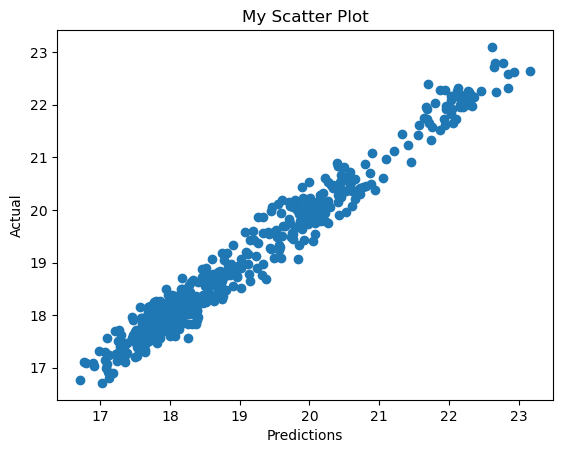

In [8]:
plt.scatter(predictions, actual)
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("My Scatter Plot")
plt.show()
